# #### Data Analysis Phase--------------------------------------------------------------------------

In [1]:
## MAin aim is to understand more about the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
original_dataset=pd.read_csv('train_0OECtn8.csv')

## print shape of dataset with rows and columns
original_dataset.shape

(89197, 10)

In [3]:
original_dataset.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [4]:
dataset = original_dataset.drop(['row_id'],axis=1)

In [5]:
dataset.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


# Missing values

In [6]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
print("features_with_na:", features_with_na)

features_with_na: []


## Numerical Variables
- Numerical variables are usually of 2 type
- Discrete Variables and Continous variables

In [7]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  7


,user_id,category_id,video_id,age,followers,views,engagement_score
0,19990,37,128,24,180,1000,4.33
1,5304,32,132,14,330,714,1.79
2,1840,12,24,19,180,138,4.35
3,12597,23,112,19,220,613,3.77
4,13626,23,112,27,220,613,3.13


- Discrete Variables

In [8]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [9]:
discrete_feature

['followers']

In [10]:
dataset[discrete_feature].head()

,followers
0,180
1,330
2,180
3,220
4,220


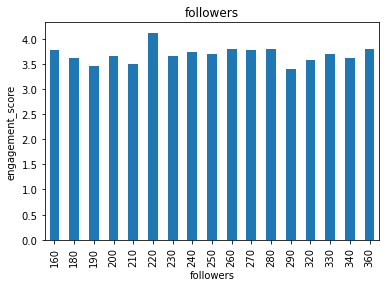

In [11]:
## Lets Find the realtionship between them and video engagement score
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['engagement_score'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('engagement_score')
    plt.title(feature)
    plt.show()

- Continuous Variables

In [12]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 6


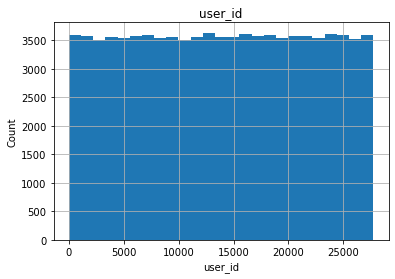

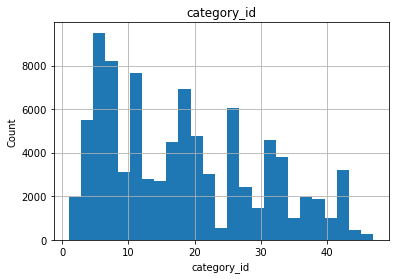

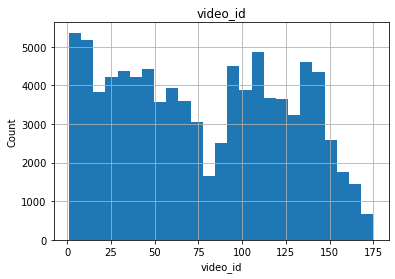

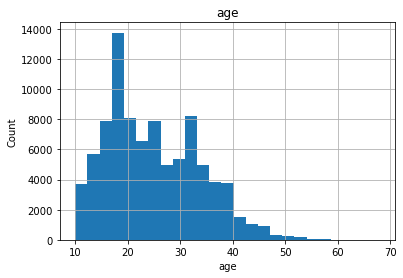

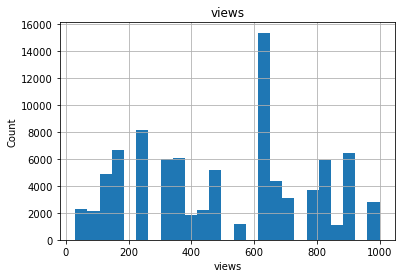

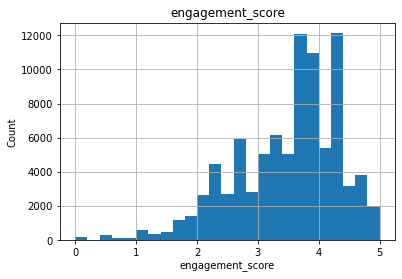

In [13]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

C:\Users\Vidya\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


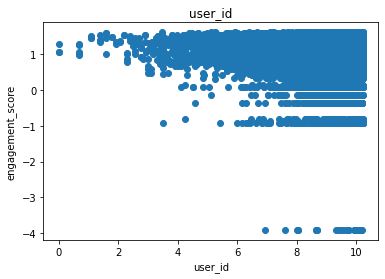

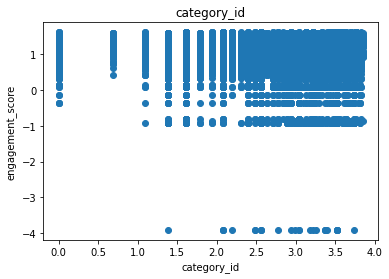

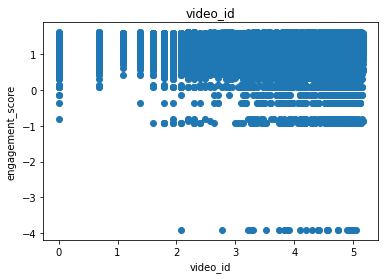

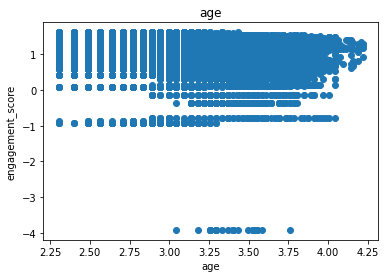

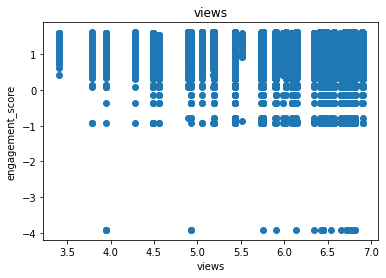

In [14]:
## We will be using logarithmic transformation for continuous features
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['engagement_score']=np.log(data['engagement_score'])
        plt.scatter(data[feature],data['engagement_score'])
        plt.xlabel(feature)
        plt.ylabel('engagement_score')
        plt.title(feature)
        plt.show()

# outliers

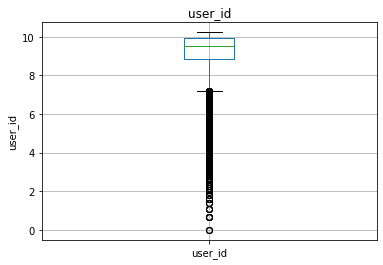

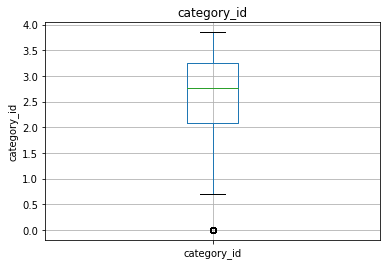

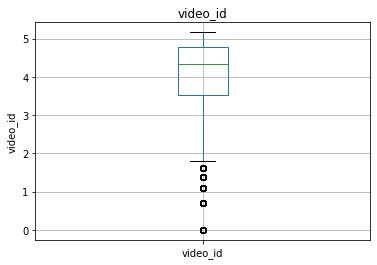

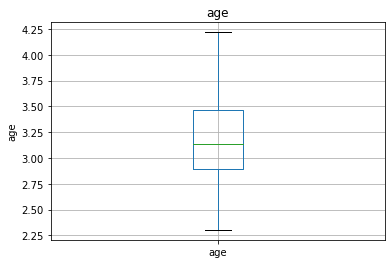

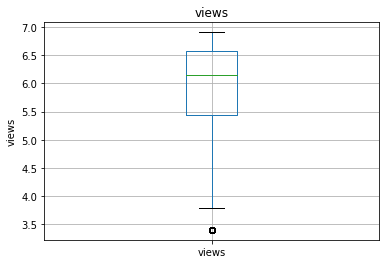

In [15]:
# Finding outliers in continuous features
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## categorical feature

In [16]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['gender', 'profession']

In [17]:
dataset[categorical_features].head()

,gender,profession
0,Male,Student
1,Female,Student
2,Male,Student
3,Male,Student
4,Male,Working Professional


In [18]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is gender and number of categories are 2
The feature is profession and number of categories are 3


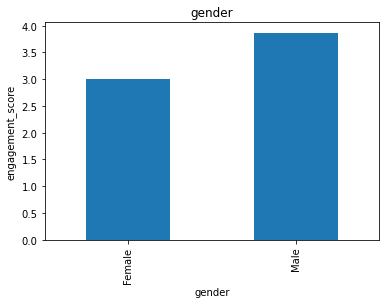

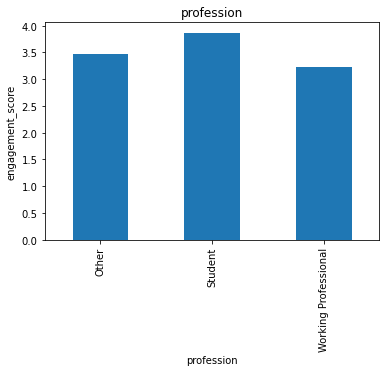

In [19]:
## Finding out the relationship between categorical variable and dependent feature engagement_score
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['engagement_score'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('engagement_score')
    plt.title(feature)
    plt.show()

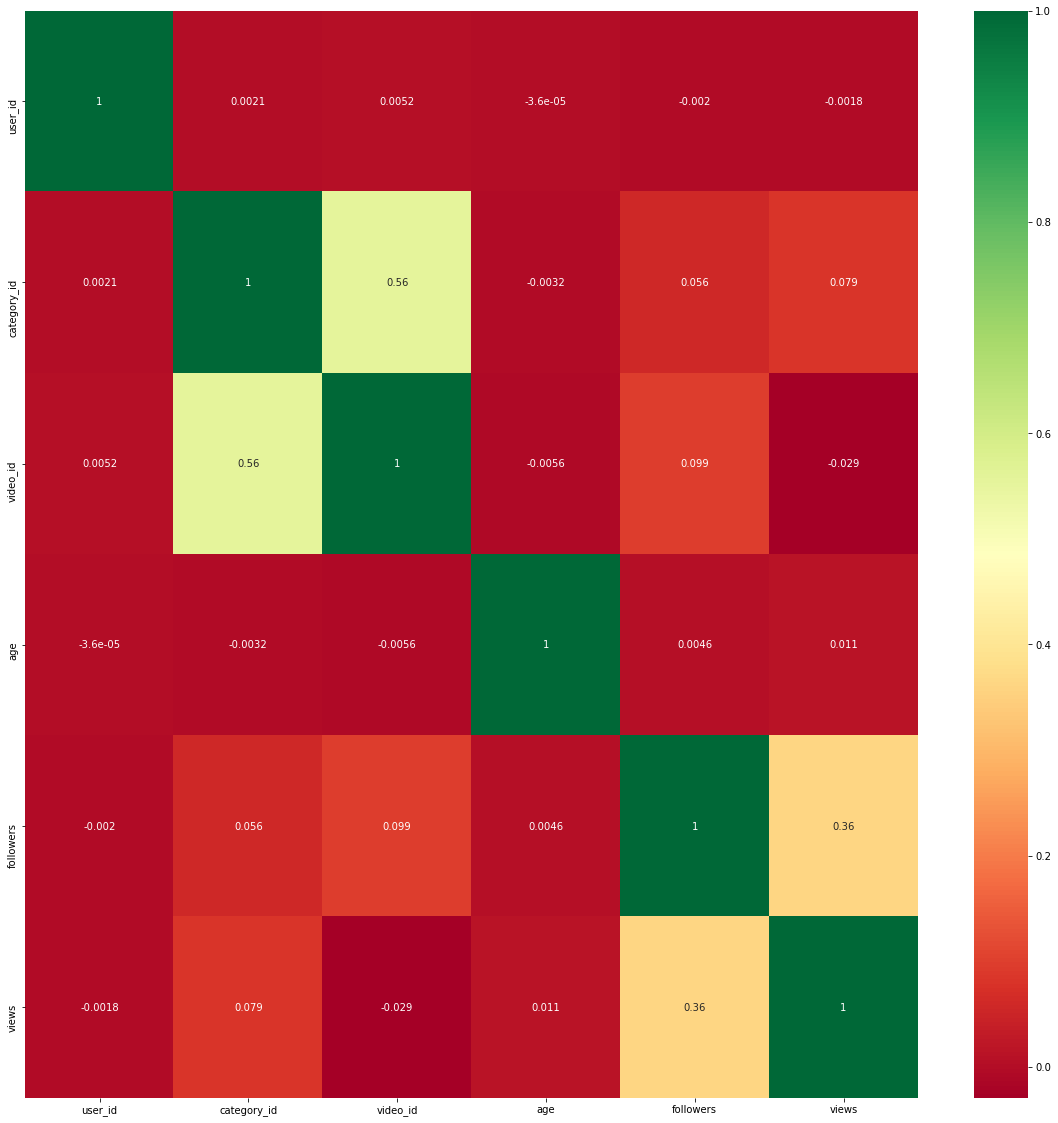

In [20]:
#get correlations of each features in dataset
corrmat = dataset.drop(['engagement_score'], axis=1).corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# #### Feature engineering-------------------------------------------------------------------------
- From the above drawn heatmap , it is concluded that category_id and video_id are positively correlated and user_id is not significant feature, hence we are not considering user_id and video_id along with dependent feature from set of features for further process

In [21]:
for feature in ['category_id', 'age', 'followers', 'views']:
    dataset[feature]=np.log(dataset[feature])

In [22]:
gender_dict = {'Male':1, 'Female':0}
profession_dict = {'Student':2, 'Working Professional':0, 'Other':1}

dataset['gender'] = dataset['gender'].map(gender_dict)
dataset['profession'] = dataset['profession'].map(profession_dict)


In [23]:
dataset.head(10)

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,3.610918,128,3.178054,1,2,5.192957,6.907755,4.33
1,5304,3.465736,132,2.639057,0,2,5.799093,6.570883,1.79
2,1840,2.484907,24,2.944439,1,2,5.192957,4.927254,4.35
3,12597,3.135494,112,2.944439,1,2,5.393628,6.418365,3.77
4,13626,3.135494,112,3.295837,1,0,5.393628,6.418365,3.13
5,9323,3.218876,139,3.555348,1,1,5.480639,5.758902,3.33
6,2071,1.945910,14,3.135494,1,2,5.075174,6.146329,3.80
7,21848,2.079442,100,2.890372,1,2,5.634790,6.442540,3.87
8,12896,1.098612,4,2.708050,1,2,5.598422,6.431331,2.88
9,16058,1.609438,161,2.944439,1,2,5.480639,5.433722,3.80


In [24]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['engagement_score', 'user_id', 'video_id']]

In [25]:
scaling_feature

['category_id', 'age', 'gender', 'profession', 'followers', 'views']

# #### Feature scaling---------------------------------------------------------------------------------

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[scaling_feature])

MinMaxScaler()

In [27]:
# transform the train and test set, and add on the Id and SalePrice variables
dataset[scaling_feature]=scaler.transform(dataset[scaling_feature])

In [28]:
dataset.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,0.937865,128,0.456705,1.0,1.0,0.145244,1.000000,4.33
1,5304,0.900157,132,0.175527,0.0,1.0,0.892702,0.903931,1.79
2,1840,0.645406,24,0.334836,1.0,1.0,0.145244,0.435201,4.35
3,12597,0.814383,112,0.334836,1.0,1.0,0.392702,0.860436,3.77
4,13626,0.814383,112,0.518149,1.0,0.0,0.392702,0.860436,3.13


# #### fetaure selection-------------------------------------------------------------------------------


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset[scaling_feature],dataset['engagement_score'],test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((62437, 6), (26760, 6))

In [30]:
## for feature slection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [31]:
dataset.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,0.937865,128,0.456705,1.0,1.0,0.145244,1.000000,4.33
1,5304,0.900157,132,0.175527,0.0,1.0,0.892702,0.903931,1.79
2,1840,0.645406,24,0.334836,1.0,1.0,0.145244,0.435201,4.35
3,12597,0.814383,112,0.334836,1.0,1.0,0.392702,0.860436,3.77
4,13626,0.814383,112,0.518149,1.0,0.0,0.392702,0.860436,3.13


In [32]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.001, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [33]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True])

In [34]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_features = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_features)))
print(X_train.columns)

total features: 6
selected features: 6
Index(['category_id', 'age', 'gender', 'profession', 'followers', 'views'], dtype='object')


In [35]:
selected_features = list(selected_features)

In [36]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [37]:
X_train.head()

,category_id,age,gender,profession,followers,views
6159,0.622806,0.537121,1.0,0.5,0.550340,0.510974
45351,0.418020,0.723187,0.0,0.5,0.500000,0.579635
19559,0.836040,0.537121,1.0,0.5,0.500000,0.672370
83744,0.900157,0.622833,1.0,0.5,0.892702,0.903931
23113,0.764760,0.606780,0.0,0.5,0.447518,0.715687


In [38]:
X_test.head()

,category_id,age,gender,profession,followers,views
45432,0.685443,0.456705,0.0,0.5,0.500000,0.735826
50153,0.000000,0.696429,0.0,0.5,1.000000,0.997134
65753,0.908149,0.498461,1.0,0.0,0.645244,0.957651
70165,0.285343,0.653528,1.0,0.5,0.645244,0.864133
39383,0.900157,0.573112,0.0,0.0,0.892702,0.903931


# #### Defining and training XGBoost model--------------------------------------------------
 - Defining the model
 - Training the model
 - Quick sanity check on trained model performance
 - plotting the residual plot and Prediction Error Plot

R-Squared:  0.35
RMSE:  0.7

Residuals Plot


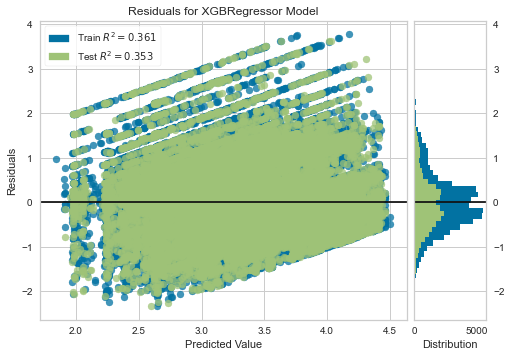

AttributeError: 'XGBRegressor' object has no attribute 'line_color'

AttributeError: 'XGBRegressor' object has no attribute 'line_color'

In [39]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

# Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(max_depth=5, 
                            n_estimators=150, 
                            n_jobs=4,
                            #objectvie='reg:squarederror',
                            booster='gbtree',
                            random_state=42, 
                            colsample_bylevel=0.5,
                            learning_rate=0.08, 
                            reg_lambda=1)

# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test) # Predictions
y_true = y_test # True values

R_squared = r2_score(y_true, y_pred)

MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)

print("R-Squared: ", np.round(R_squared, 2))
print("RMSE: ", np.round(RMSE, 2))
# Making the Residuals Plot
print("\nResiduals Plot")
residuals_plot(xgb_reg, X_train, y_train, X_test, y_test)


Prediction Error Plot


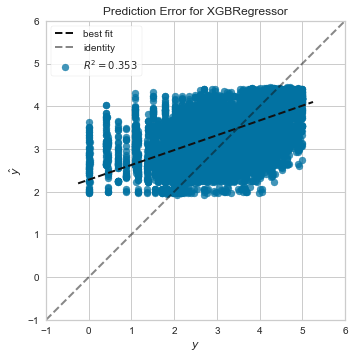

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=0.5,
                                       colsample_bynode=1, colsample_bytree=1,
                                       enable_categorical=False, gamma=0,
                                       gpu_id=-1, importance_type=None,
                                       interaction_constraints='',
                                       learning_rate=0.08, max_delta_step=0,
                                       max_depth=5, min_child_weight=1,
                                       missing=nan, monotone_constraints='()',
                                       n_estimators=150, n_jobs=4,
                                       num_parallel_tree=1, predictor='auto',
                                       random_state=42, reg_alpha=0,
         

In [40]:
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
prediction_error(xgb_reg, X_train, y_train, X_test, y_test)

# #### Prediction on test datset--------------------------------------------------------------------

In [41]:
testdata_df=pd.read_csv('test_1zqHu22.csv')

In [42]:
df = testdata_df.drop(['row_id', 'user_id', 'video_id'], axis = 1)

In [43]:
df.head()

,category_id,age,gender,profession,followers,views
0,12,14,Male,Student,180,138
1,34,14,Male,Student,230,840
2,8,44,Female,Working Professional,280,628
3,16,18,Male,Student,270,462
4,34,47,Female,Other,230,840


In [44]:
gender_dict = {'Male':1, 'Female':0}
profession_dict = {'Student':2, 'Working Professional':0, 'Other':1}
for feature in ['category_id', 'age', 'followers', 'views']:
    df[feature]=np.log(df[feature])
df['gender'] = df['gender'].map(gender_dict)
df['profession'] = df['profession'].map(gender_dict)

In [45]:
df.head()

,category_id,age,gender,profession,followers,views
0,2.484907,2.639057,1,NaN,5.192957,4.927254
1,3.526361,2.639057,1,NaN,5.438079,6.733402
2,2.079442,3.784190,0,NaN,5.634790,6.442540
3,2.772589,2.890372,1,NaN,5.598422,6.135565
4,3.526361,3.850148,0,NaN,5.438079,6.733402


In [46]:
df[scaling_feature]=scaler.transform(df[scaling_feature])

In [47]:
df.head()

,category_id,age,gender,profession,followers,views
0,0.645406,0.175527,1.0,NaN,0.145244,0.435201
1,0.915903,0.175527,1.0,NaN,0.447518,0.950278
2,0.540094,0.772908,0.0,NaN,0.690091,0.867330
3,0.720125,0.306630,1.0,NaN,0.645244,0.779787
4,0.915903,0.807316,0.0,NaN,0.447518,0.950278


In [48]:
df_predictions = xgb_reg.predict(df)

In [49]:
testdata_df['engagement_score']=pd.Series(df_predictions)

In [50]:
testdata_df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,89198,7986,12,42,14,Male,Student,180,138,3.503808
1,89199,11278,34,115,14,Male,Student,230,840,3.191262
2,89200,17245,8,110,44,Female,Working Professional,280,628,2.690950
3,89201,9851,16,137,18,Male,Student,270,462,3.336468
4,89202,16008,34,96,47,Female,Other,230,840,1.979906


In [51]:
testdata_df[['row_id', 'engagement_score']].head()

,row_id,engagement_score
0,89198,3.503808
1,89199,3.191262
2,89200,2.690950
3,89201,3.336468
4,89202,1.979906


In [52]:
testdata_df[['row_id', 'engagement_score']].to_csv('xgboost_final_submissions.csv', index=False)